# Homework - Linear Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

## Data Preparation

In [35]:
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year'
]
df[base].head()

,engine_displacement,horsepower,vehicle_weight,model_year
0,170,159.0,3413.433759,2003
1,130,97.0,3149.664934,2007
2,170,78.0,3079.038997,2018
3,220,NaN,2542.392402,2009
4,210,140.0,3460.870990,2009


## Exploratory Data Analysis (EDA)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

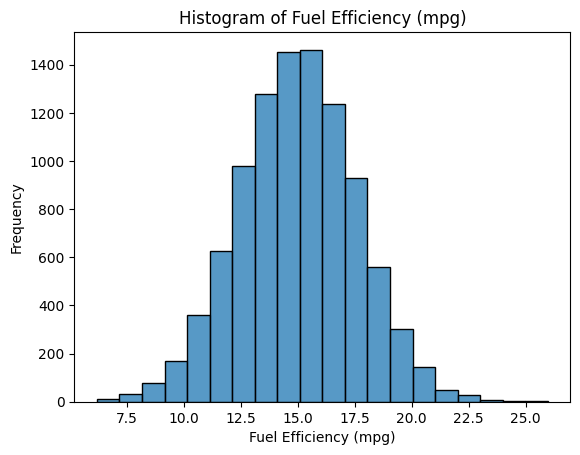

In [37]:
sns.histplot(df['fuel_efficiency_mpg'], bins=20)
plt.title('Histogram of Fuel Efficiency (mpg)')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.show()

## Question 1
There's one column with missing values. What is it? Horsepower

In [39]:
df[base].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [41]:
df.horsepower.describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [42]:
df.horsepower.median()

np.float64(149.0)

## Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42. 

Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [62]:
# calculate sizes of train, val, test sets
# 60% train, 20% val, 20% test
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [72]:
# create a sequence of indices 
idx = np.arange(n)
np.random.seed(42)  # for reproducibility
# shuffle the indices
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [73]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [74]:
df_train.shape, df_val.shape, df_test.shape

((5824, 11), (1940, 11), (1940, 11))

In [75]:
# reset the index columns
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [76]:
# target variable
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [77]:
# delete the target variable from the dataframes to prevent data leakage
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Question 3
We need to deal with missing values for the column from Q1.  
We have two options: fill it with 0 or with the mean of this variable.  
Try both options. For each, train a linear regression model without regularization using the code from the lessons.  
For computing the mean, use the training only!  
Use the validation dataset to evaluate the models and compare the RMSE of each option.  
Round the RMSE scores to 2 decimal digits using round(score, 2)  
Which option gives better RMSE?  

In [127]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X ])  # add bias-term to feature-matrix
    # create gram-matrix X^TX
    XTX = X.T.dot(X)
    # create inverse of gram-matrix (X^TX)^-1
    inv_XTX = np.linalg.inv(XTX)

    w_full = inv_XTX.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [128]:
def prepare_X(df, fillna_with_0=True):
    X = df.copy()
    X= X[base]
    # fill missing values in horsepower with 0
    if fillna_with_0:
        X['horsepower'] = X['horsepower'].fillna(0)
    else: 
        X['horsepower'] = X['horsepower'].fillna(df_train['horsepower'].mean())
    return X.values

In [129]:
X_train = prepare_X(df_train)

In [130]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

### RMSE on validation set 

In [131]:
def rmse(y, y_pred):
    diff = y - y_pred # get difference between predicted and actual values
    return np.sqrt(np.mean(diff**2)) # square them, get the average, get the root of the average

#### Option 1 - Fillna with 0

In [132]:
X_val = prepare_X(df_val, True)
y_pred_val = w0 + X_val.dot(w)
round(rmse(y_val, y_pred_val),2)

np.float64(0.52)

#### Option 2 - Fillna with mean horsepower - better RSME

In [133]:
X_val = prepare_X(df_val, False)
y_pred_val = w0 + X_val.dot(w)
round(rmse(y_val, y_pred_val),2)

np.float64(0.5)

## Question 4
